REDDIT DATA ANALYSIS WITH SENTIMENT AND EMOTION PREDICTION

SANSKAR SRIVASTAVA 20BCE1023
DEEPJYOTI KOLEY 20BCE1539

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 22.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import datetime as datetime

# Visualization libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from dateutil import tz
import pytz
# Transformer model
from transformers import pipeline

In [ ]:
# !pip install praw
# import praw

# user_agent = "Scrapper 1.0 by Glittering_Good3418"
# reddit = praw.Reddit(
#     client_id ="e4fI11Gc5AEZQEC5-7kz-A",
#     client_secret ="H3Wn6lfs-0JqTSFzpZBr3y9NDCFu0Q",
    
#     user_agent=user_agent
# )

In [ ]:
# posts = reddit.subreddit("MachineLearning+artificial+Datascience").top(time_filter="all", limit=3000)
# posts_df=[]
# for post in posts:
#     posts_df.append({
#         'datetime': post.created_utc,
#         'id': post.id,
#         'subreddit': post.subreddit.display_name,
#         'headline': post.title ,
#         'name': post.author ,
#         'text': post.selftext ,
#         'score': post.score ,
#         'link_fliair_text': post.link_flair_text,
#         'comments': post.num_comments ,
#         'upvote_ratio': post.upvote_ratio,
#         'url': post.url
#     })
   

# df = pd.DataFrame(posts_df)

In [ ]:
# df.to_csv('DS_ML_AI_posts.csv', header=True, index=False)

In [ ]:
df = pd.read_csv("/content/DS_ML_AI_posts.csv")

In [ ]:
number_of_posts = df.shape[0]
print(number_of_posts)

count_subreddits = df['subreddit'].nunique()
count_subreddits

2987


3

In [ ]:
df.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7780,186,0.99
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,5836,133,0.98
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4758,111,0.97
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4683,230,0.97
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4554,228,0.95


In [ ]:
df['created_date'] = df['created_utc'].apply(lambda x: datetime.fromtimestamp(x))
df['created_year'] = df['created_date'].dt.year
df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7780,186,0.99,2020-05-10 13:19:54,2020
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,5836,133,0.98,2021-01-10 10:30:36,2021
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4758,111,0.97,2020-04-25 04:27:23,2020
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4683,230,0.97,2021-02-28 15:12:28,2021
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4554,228,0.95,2021-07-11 04:18:59,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
2982,y0nkkl,artificial,1.665430e+09,NaN,https://i.imgur.com/gPxzFqU.jpg,Google’s AI just laughed at me,Discussion,81,6,0.90,2022-10-10 19:25:29,2022
2983,xbirql,artificial,1.662903e+09,NaN,https://techaint.com/2022/09/11/dall-e-ai-is-n...,Dall-E AI is now able to see beyond the frame ...,News,82,8,0.85,2022-09-11 13:36:22,2022
2984,uehsmw,artificial,1.651223e+09,NaN,https://i.redd.it/g46kh5zoofw81.png,"Night Cafe ""fire on the nuclear plant in the a...",My project,81,1,0.94,2022-04-29 09:06:40,2022
2985,n2j1vo,artificial,1.619878e+09,NaN,https://youtu.be/NIOt1HLV_Mo,Infinite Nature: Fly into an image and explore...,News,81,5,0.97,2021-05-01 14:08:54,2021


In [ ]:
# comments_list = []
# for id in df['post_id']:
#   submission = reddit.submission(id)
#   submission.comments.replace_more(limit=None)
#   for comment in submission.comments.list():
#     comments_list.append({'post_id': id, 'comment': comment.body})


# 
# df_c = pd.DataFrame(comments_list)

In [ ]:
# df_c.to_csv('DS_ML_AI_comments.csv', header=True, index=False)

In [ ]:
comments_df = pd.read_csv("/content/DS_ML_AI_comments.csv")

In [ ]:
df = df.merge(comments_df, on='post_id', how='left')
df = df[~df['comment'].isnull()]


In [ ]:
df.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7780,186,0.99,2020-05-10 13:19:54,2020,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7780,186,0.99,2020-05-10 13:19:54,2020,Simple yet very useful. Thank you for sharing ...
2,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7780,186,0.99,2020-05-10 13:19:54,2020,The future 🤯
3,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7780,186,0.99,2020-05-10 13:19:54,2020,Ohh the nightmare of making this into a stable...
4,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7780,186,0.99,2020-05-10 13:19:54,2020,"Almost guaranteed, Apple will copy your idea i..."


In [ ]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="created_year", y="..count..", color="subreddit", fill="subreddit"), data=df, sampling="none" if df.size < 50 else sampling_pick(n=50)) + \
ggtitle("Number of posts by year") 

In [ ]:
from lets_plot import * 
ggplot() + \
geom_line(aes(x="upvote_ratio", y="score"), data=df, sampling="none" if df.size < 2500 else sampling_systematic(n=2500)) + \
ggtitle("Chart") 

In [ ]:
from lets_plot import * 
ggplot() + \
geom_area(aes(x="score", y="num_comments"), data=df, sampling="none" if df.size < 2500 else sampling_systematic(n=2500), stat="identity", position="identity") + \
ggtitle("Chart") 

In [ ]:
from lets_plot import *
ggplot(df) + geom_area(aes(x="post_id", y="num_comments"), stat='identity', position='identity')

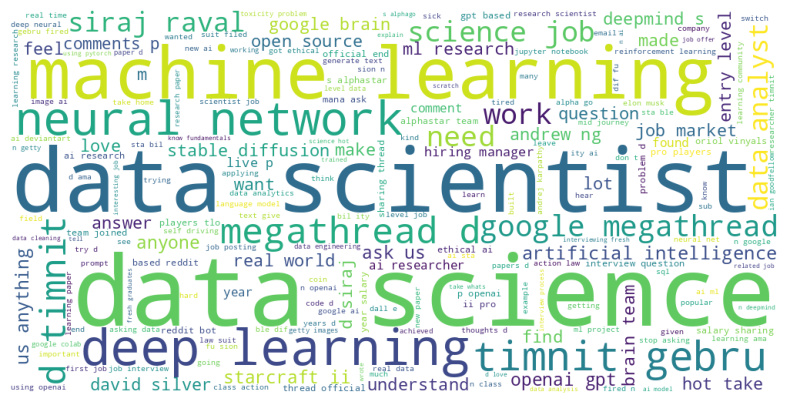

In [ ]:
post_title_text = ' '.join([title for title in df['post_title'].str.lower()])

word_cloud = WordCloud(collocation_threshold = 2, width=1000, height=500,
                        background_color = 'white'
                       ).generate(post_title_text)

# Display the generated Word Cloud
plt.figure( figsize=(10,5) )
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

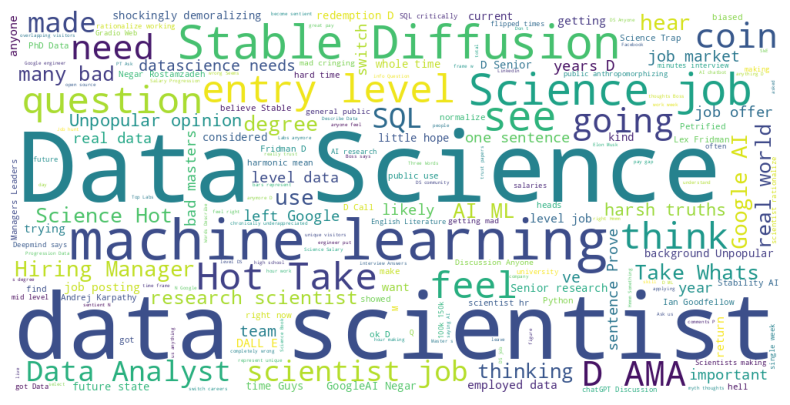

In [ ]:
posts_in_year = df[df['created_year'] == 2022]
post_title_text_year = ' '.join(item for item in posts_in_year[~posts_in_year['post_title'].isna()]['post_title'])

word_cloud = WordCloud(collocation_threshold = 2, width=1000, height=500,
                        background_color = 'white',
                    ).generate(post_title_text_year)

# Display the generated Word Cloud
plt.figure( figsize=(10,5) )
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
!pip install emoji
sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=e4da7204c6e3a8ed825d092ff8e1da80894109a02c4e82e84ae01f83e2a0f083
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji


In [ ]:
def get_sentiment(text):
    # Get sentiment prediction scores
    try:
        sentiment = sentiment_classifier(text, truncation=True)[0]['label']
    except:   
        sentiment = 'Not classified'

    return sentiment


In [ ]:

comments_df_sub = df[df['post_title'].str.contains('diffusion')]
 



In [ ]:
comments_df_sub['sentiment'] = comments_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))
comments_df_sub

<ipython-input-19-1671145ceb12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df_sub['sentiment'] = comments_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))


,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment
13580,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,colab: [https://colab.research.google.com/gith...,NEU
13581,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,That's a nice trick.,POS
13582,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,"Great Project!\nInspired by this project, I wr...",POS
13583,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,"y'all are nuts, i get excited when my shitty s...",NEG
13584,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,did anyone manage to set it up?,NEU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,wv8coc,artificial,1.661210e+09,NaN,https://i.redd.it/jvtrj0jtkcj91.png,build a web demo for stable diffusion in googl...,Project,202,9,0.98,2022-08-22 23:14:08,2022,"I hate AI art, how dare you combine two things...",NEG
206200,wv8coc,artificial,1.661210e+09,NaN,https://i.redd.it/jvtrj0jtkcj91.png,build a web demo for stable diffusion in googl...,Project,202,9,0.98,2022-08-22 23:14:08,2022,Let's hope we can diffuse the workload too!,POS
206201,wv8coc,artificial,1.661210e+09,NaN,https://i.redd.it/jvtrj0jtkcj91.png,build a web demo for stable diffusion in googl...,Project,202,9,0.98,2022-08-22 23:14:08,2022,Hey can I ask how you built the web app using ...,NEU
206202,wv8coc,artificial,1.661210e+09,NaN,https://i.redd.it/jvtrj0jtkcj91.png,build a web demo for stable diffusion in googl...,Project,202,9,0.98,2022-08-22 23:14:08,2022,It can also be used on replicate.com and is ac...,NEU


In [ ]:
comments_df_sub.columns

Index(['post_id', 'subreddit', 'created_utc', 'selftext', 'post_url',
       'post_title', 'link_flair_text', 'score', 'num_comments',
       'upvote_ratio', 'created_date', 'created_year', 'comment', 'sentiment'],
      dtype='object')

In [ ]:
comments_df_sub.describe()

,created_utc,score,num_comments,upvote_ratio,created_year
count,3.190000e+02,319.000000,319.000000,319.000000,319.000000
mean,1.667727e+09,805.777429,42.094044,0.974075,2022.219436
std,4.561261e+06,502.653235,16.064451,0.012552,0.414515
min,1.661210e+09,202.000000,9.000000,0.950000,2022.000000
25%,1.664678e+09,404.000000,31.000000,0.970000,2022.000000
50%,1.665419e+09,854.000000,47.000000,0.980000,2022.000000
75%,1.667569e+09,1095.000000,57.000000,0.980000,2022.000000
max,1.677361e+09,1726.000000,60.000000,0.990000,2023.000000


In [ ]:
comments_df_sub.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 13580 to 206203
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   post_id          319 non-null    object        
 1   subreddit        319 non-null    object        
 2   created_utc      319 non-null    float64       
 3   selftext         14 non-null     object        
 4   post_url         319 non-null    object        
 5   post_title       319 non-null    object        
 6   link_flair_text  319 non-null    object        
 7   score            319 non-null    int64         
 8   num_comments     319 non-null    int64         
 9   upvote_ratio     319 non-null    float64       
 10  created_date     319 non-null    datetime64[ns]
 11  created_year     319 non-null    int64         
 12  comment          319 non-null    object        
 13  sentiment        319 non-null    object        
dtypes: datetime64[ns](1), float64(2), i

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 KB 1.5 MB/s eta 0:00:00


In [ ]:
import re
import string
import emoji
import demoji
demoji.download_codes()

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    # Remove emojis
    text = demoji.replace(text,repl="")
    #text = ''.join(c for c in text if c not in emoji.UNICODE_EMOJI)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra white space
    text = re.sub(r'\s+', ' ', text)
    # Lowercase text
    text = text.lower().strip()
    return text

comments_df_sub['clean_comment'] = comments_df_sub['comment'].apply(lambda x: clean_text(x))


<ipython-input-25-a5da129e54e0>:5: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()
<ipython-input-25-a5da129e54e0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df_sub['clean_comment'] = comments_df_sub['comment'].apply(lambda x: clean_text(x))


In [ ]:
comments_df_sub.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment,clean_comment
13580,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,colab: [https://colab.research.google.com/gith...,NEU,colab github hugging face spaces demo new
13581,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,That's a nice trick.,POS,thats a nice trick
13582,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,"Great Project!\nInspired by this project, I wr...",POS,great project inspired by this project i wrote...
13583,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,"y'all are nuts, i get excited when my shitty s...",NEG,yall are nuts i get excited when my shitty sci...
13584,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,did anyone manage to set it up?,NEU,did anyone manage to set it up


In [ ]:
comments_df_sub['clean_comment'].shape

(319,)

In [ ]:
import pandas as pd

# Load the data


# Create a dictionary to store the lexicons
sentiment_lexicons = {'positive': [], 'negative': [], 'neutral': []}

# Loop through the data and append the words to the appropriate lexicon
for index, row in comments_df_sub.iterrows():
    if row['sentiment'] == 'POS':
        sentiment_lexicons['positive'].extend(row['clean_comment'].split())
    elif row['sentiment'] == 'NEG':
        sentiment_lexicons['negative'].extend(row['clean_comment'].split())
    else:
        sentiment_lexicons['neutral'].extend(row['clean_comment'].split())

# Remove duplicate words from the lexicons
sentiment_lexicons['positive'] = list(set(sentiment_lexicons['positive']))
sentiment_lexicons['negative'] = list(set(sentiment_lexicons['negative']))
sentiment_lexicons['neutral'] = list(set(sentiment_lexicons['neutral']))

# Print the lexicons
print(sentiment_lexicons)


{'positive': ['future', 'shouldn’t', 'gnns', 'api', 'out', 'you’ll', 'get', 'tool', 'even', 'released', 'planning', 'installed', 'more', 'textual', 'digestible', 'can', 'major', 'compared', 'code', 'new', 'working', 'one', 'trained', 'hey', 'punished', 'far', 'said', 'did', 'data', 'diffuse', 'andrej', 'hfcocourse', 'you’re', 'do', 'easy', 'huggingface', 'conceptually', 'experimented', 'forward', 'proof', 'properties', 'overhead', 'typed', 'rap', 'tip', 'setup', 'beautiful', 'able', 'resourceungry', 'sub', 'class', 'trivial', 'imagenet”', 'deep', 'big', 'something', 'theoretically', 'could', 'pixpix', 'believe', '·', 'as', 'upscaling', 'where', 'noticed', 'standard', 'exciting', 'although', 'wrong', 'fee', 'easier', 'results', 'running', 'oh', 'questions', 'someone', 'sure', 'need', 'sharing', 'hundreds', 'hilarious', 'scorer', 'shoes', 'plausible', 'huge', 'to', 'job', 'texttoimage', 'most', 'issue', 'original', 'haha', 'take', 'purposes', 'understand', 'added', 'within', 't', 'attemp

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.model_selection import train_test_split

# Define the individual classifiers
dt = DecisionTreeClassifier()
nb = MultinomialNB()
lr = LogisticRegression()

# Define the ensemble classifier using the voting scheme
ensemble = VotingClassifier(estimators=[('dt', dt), ('nb', nb), ('lr', lr)], voting='soft')
mo_df = comments_df_sub
X = mo_df['clean_comment'] # text data
y = mo_df['sentiment'] # categorical labels
le = LabelEncoder()
y = le.fit_transform(y) # convert categorical labels to numerical labels

# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

# Combine BOW features with numerical labels
X_final = np.hstack((X_bow.toarray(), y.reshape(-1, 1)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
# Train the ensemble classifier on the training set
ensemble.fit(X_train, y_train)

# Evaluate the performance of the ensemble classifier on the testing set
ensemble_score = ensemble.score(X_test, y_test)

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
# Make predictions on the test set
y_pred = ensemble.predict(X_test)

# Calculate f1 score

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("F1 score: {:.3f}".format(f1))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("Confusion Matrix:")
print(cm)



F1 score: 0.851
Precision: 0.900
Recall: 0.875
Confusion Matrix:
[[ 4  8  0]
 [ 0 32  0]
 [ 0  0 20]]


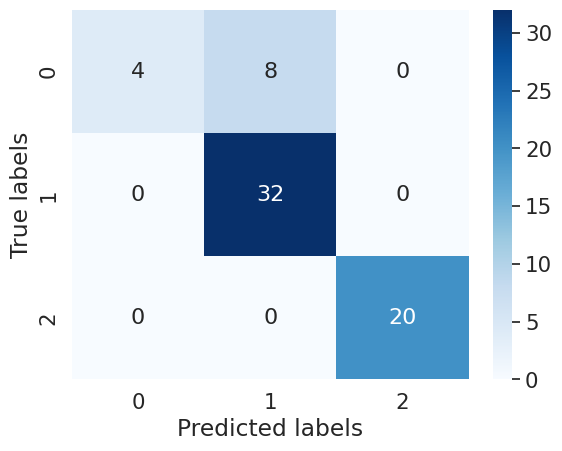

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


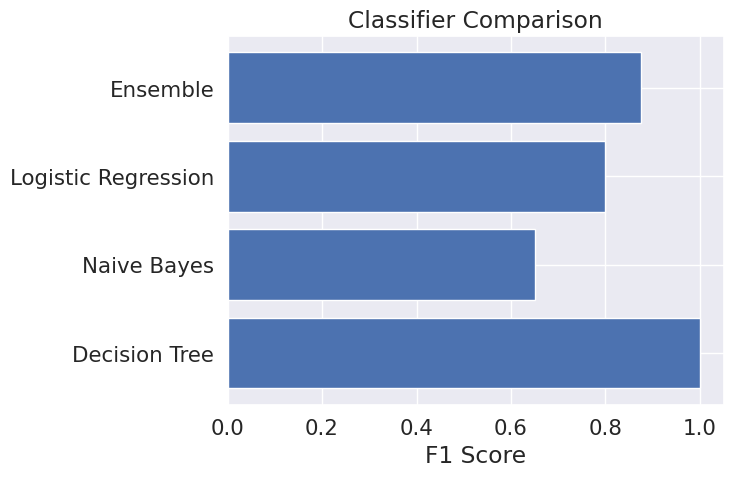

In [ ]:
# Calculate F1 score for each classifier
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)

dt_f1 = f1_score(y_test, dt.predict(X_test), average='weighted')
nb_f1 = f1_score(y_test, nb.predict(X_test), average='weighted')
lr_f1 = f1_score(y_test, lr.predict(X_test), average='weighted')
ensemble_f1 = ensemble_score

# Plot bar chart
classifiers = ['Decision Tree', 'Naive Bayes', 'Logistic Regression', 'Ensemble']
f1_scores = [dt_f1, nb_f1, lr_f1, ensemble_f1]

plt.barh(classifiers, f1_scores)
plt.xlabel('F1 Score')
plt.title('Classifier Comparison')
plt.show()


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the individual classifiers

nb = MultinomialNB()
lr = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()

# Define the stacking ensemble classifier
estimators = [('nb', nb), ('lr', lr)]
stacking = StackingClassifier(estimators=estimators, final_estimator=rf)
mos_df = comments_df_sub

X = mos_df['clean_comment'] # text data
y = mos_df['sentiment'] # categorical labels
le = LabelEncoder()
y = le.fit_transform(y) # convert categorical labels to numerical labels

# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

# Combine BOW features with numerical labels
X_final = np.hstack((X_bow.toarray(), y.reshape(-1, 1)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.1, random_state=42)

# Train the stacking ensemble classifier on the training set
stacking.fit(X_train, y_train)

# Evaluate the performance of the stacking ensemble classifier on the testing set
stacking_score = stacking.score(X_test, y_test)
print(stacking_score)
y_pred = stacking.predict(X_test)

# Calculate f1 score

f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("F1 score: {:.3f}".format(f1))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("Confusion Matrix:")
print(cm)

0.96875
F1 score: 0.968
Precision: 0.971
Recall: 0.969
Confusion Matrix:
[[ 6  1  0]
 [ 0 14  0]
 [ 0  0 11]]


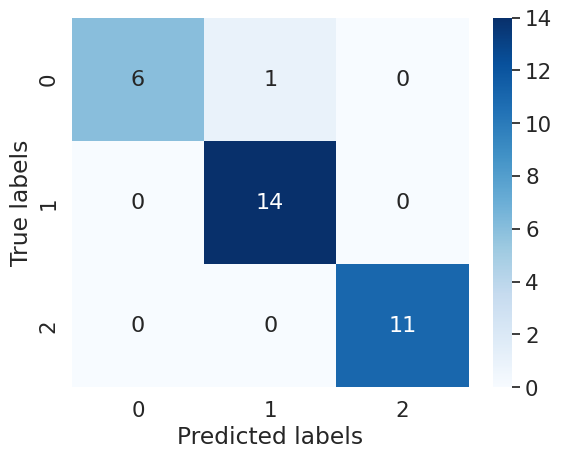

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


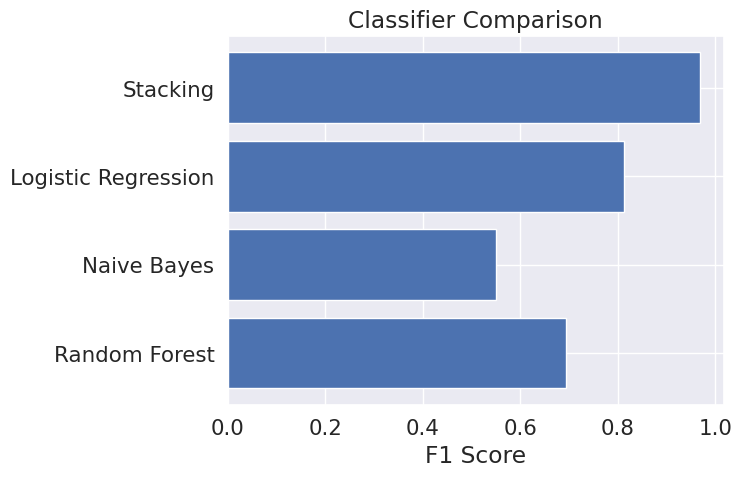

In [ ]:
# Calculate F1 score for each classifier
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)

rf_f1 = f1_score(y_test, rf.predict(X_test), average='weighted')
nb_f1 = f1_score(y_test, nb.predict(X_test), average='weighted')
lr_f1 = f1_score(y_test, lr.predict(X_test), average='weighted')
ensemble_f1 = stacking_score

# Plot bar chart
classifiers = ['Random Forest', 'Naive Bayes', 'Logistic Regression', 'Stacking']
f1_scores = [rf_f1, nb_f1, lr_f1, ensemble_f1]

plt.barh(classifiers, f1_scores)
plt.xlabel('F1 Score')
plt.title('Classifier Comparison')
plt.show()


In [ ]:
!pip install lets_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 7.3 MB/s eta 0:00:00


In [ ]:
from lets_plot import *
from lets_plot.mapping import *

ggplot(comments_df_sub) + geom_pie(aes(fill=as_discrete('sentiment', order_by='..count..')), 
                                            size=30, hole=0.2, stroke=1.0, 
                                            labels=layer_labels()
                                                    .line('@sentiment')
                                                    .line('(@{..prop..})')
                                                    .format('..prop..', '.0%')
                                        ) \
                              + theme(line=element_blank(), axis_text=element_blank(), 
                                      axis_title=element_blank(), legend_position='none') \
                              + ggtitle('Sentiment of around the topic')

In [ ]:
emotion_classifier = pipeline("text-classification",model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores=True)

/usr/local/lib/python3.9/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
def get_emotion(text):
    # Get emotion prediction scores
    pred_scores = emotion_classifier(text)

    # Get emotion with highest prediction score
    emotion = max(pred_scores[0], key=lambda x: x['score'])['label']

    return emotion

In [ ]:
comments_df_sub['emotion'] = comments_df_sub['comment'].astype(str).apply(lambda x: get_emotion(x))
comments_df_sub

<ipython-input-52-860e768091c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_df_sub['emotion'] = comments_df_sub['comment'].astype(str).apply(lambda x: get_emotion(x))


,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment,clean_comment,emotion
13580,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,colab: [https://colab.research.google.com/gith...,NEU,colab github hugging face spaces demo new,joy
13581,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,That's a nice trick.,POS,thats a nice trick,joy
13582,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,"Great Project!\nInspired by this project, I wr...",POS,great project inspired by this project i wrote...,sadness
13583,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,"y'all are nuts, i get excited when my shitty s...",NEG,yall are nuts i get excited when my shitty sci...,sadness
13584,xtd8kc,MachineLearning,1.664678e+09,NaN,https://v.redd.it/w00lkjcl0br91,[P] stablediffusion-infinity: Outpainting with...,Project,1726,57,0.98,2022-10-02 02:34:58,2022,did anyone manage to set it up?,NEU,did anyone manage to set it up,fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206199,wv8coc,artificial,1.661210e+09,NaN,https://i.redd.it/jvtrj0jtkcj91.png,build a web demo for stable diffusion in googl...,Project,202,9,0.98,2022-08-22 23:14:08,2022,"I hate AI art, how dare you combine two things...",NEG,i hate ai art how dare you combine two things ...,anger
206200,wv8coc,artificial,1.661210e+09,NaN,https://i.redd.it/jvtrj0jtkcj91.png,build a web demo for stable diffusion in googl...,Project,202,9,0.98,2022-08-22 23:14:08,2022,Let's hope we can diffuse the workload too!,POS,lets hope we can diffuse the workload too,joy
206201,wv8coc,artificial,1.661210e+09,NaN,https://i.redd.it/jvtrj0jtkcj91.png,build a web demo for stable diffusion in googl...,Project,202,9,0.98,2022-08-22 23:14:08,2022,Hey can I ask how you built the web app using ...,NEU,hey can i ask how you built the web app using ...,joy
206202,wv8coc,artificial,1.661210e+09,NaN,https://i.redd.it/jvtrj0jtkcj91.png,build a web demo for stable diffusion in googl...,Project,202,9,0.98,2022-08-22 23:14:08,2022,It can also be used on replicate.com and is ac...,NEU,it can also be used on replicatecom and is acc...,joy


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define the individual classifiers
dt = DecisionTreeClassifier()
nb = MultinomialNB()
lr = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()

# Define the stacking ensemble classifier
estimators = [('dt', dt), ('nb', nb), ('lr', lr)]
stacking = StackingClassifier(estimators=estimators, final_estimator=rf)
mos_df_n = comments_df_sub

X = mos_df_n['clean_comment'] # text data
y = mos_df_n['emotion'] # categorical labels
le = LabelEncoder()
y = le.fit_transform(y) # convert categorical labels to numerical labels

# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

# Combine BOW features with numerical labels
X_final = np.hstack((X_bow.toarray(), y.reshape(-1, 1)))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.1, random_state=42)

# Train the stacking ensemble classifier on the training set
stacking.fit(X_train, y_train)

# Evaluate the performance of the stacking ensemble classifier on the testing set
stacking_score = stacking.score(X_test, y_test)
print(stacking_score)
y_pred = stacking.predict(X_test)

# Compute the performance metrics
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("F1 score: {:.3f}".format(f1))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("Confusion Matrix:")
print(cm)

0.96875
F1 score: 0.953
Precision: 0.939
Recall: 0.969
Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0 21  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  0  2]]


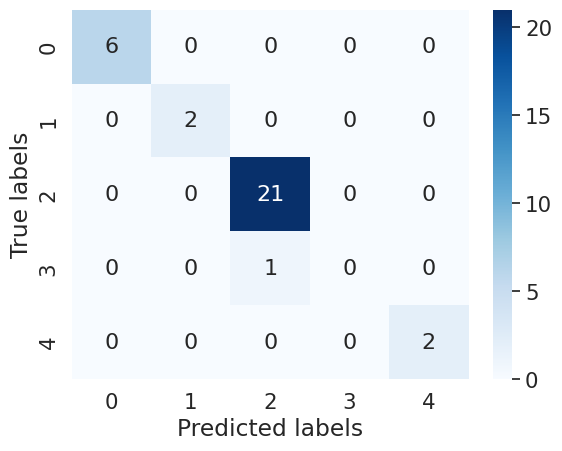

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


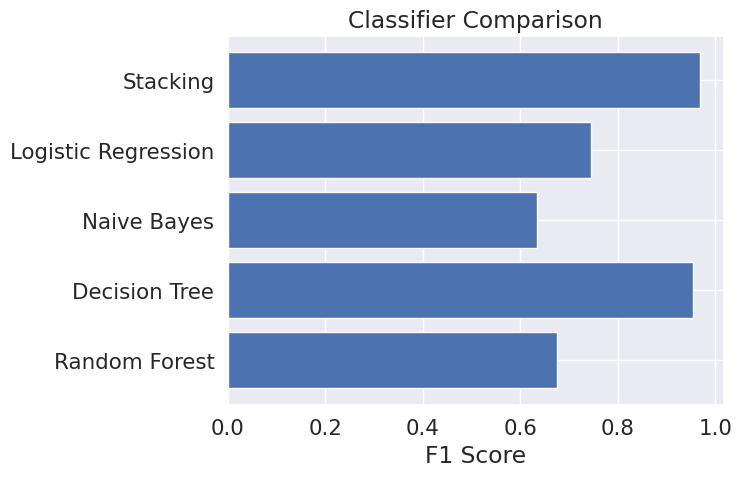

In [ ]:
# Calculate F1 score for each classifier
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
lr.fit(X_train, y_train)

rf_f1 = f1_score(y_test, rf.predict(X_test), average='weighted')
dt_f1 = f1_score(y_test, dt.predict(X_test), average='weighted')
nb_f1 = f1_score(y_test, nb.predict(X_test), average='weighted')
lr_f1 = f1_score(y_test, lr.predict(X_test), average='weighted')
Stacking_f1 = stacking_score

# Plot bar chart
classifiers = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'Logistic Regression', 'Stacking']
f1_scores = [rf_f1,dt_f1, nb_f1, lr_f1, Stacking_f1]

plt.barh(classifiers, f1_scores)
plt.xlabel('F1 Score')
plt.title('Classifier Comparison')
plt.show()


In [ ]:
from lets_plot import * 
ggplot() + \
geom_bar(aes(x="emotion", y="..count.."), data=comments_df_sub, sampling="none" if comments_df_sub.size < 50 else sampling_pick(n=50)) + \
ggtitle("Emotions around the topic") 

In [ ]:
from lets_plot import *
from lets_plot.mapping import *

ggplot(comments_df_sub) + geom_pie(aes(fill=as_discrete('emotion', order_by='..count..')), 
                                            size=30, hole=0.2, stroke=1.0, 
                                            labels=layer_labels()
                                                    .line('@emotion')
                                                    .line('(@{..prop..})')
                                                    .format('..prop..', '.0%')
                                        ) \
                              + theme(line=element_blank(), axis_text=element_blank(), 
                                      axis_title=element_blank(), legend_position='none') \
                              + ggtitle('Emotion around the topic')